In [ ]:
!pip install pymoo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for grapheme: filename=grapheme-0.6.0-py3-none-any.whl size=210078 sha256=30f173cc9a5e180a0aa581e01b3cf74d01824f981fe9c82826ce485e4184eca8
  Stored in directory: /root/.cache/pip/wheels/01/e1/49/37e6bde9886439057450c494a79b0bef8bbe897a54aebfc757
Successfully built grapheme


In [ ]:
#!pip install deap

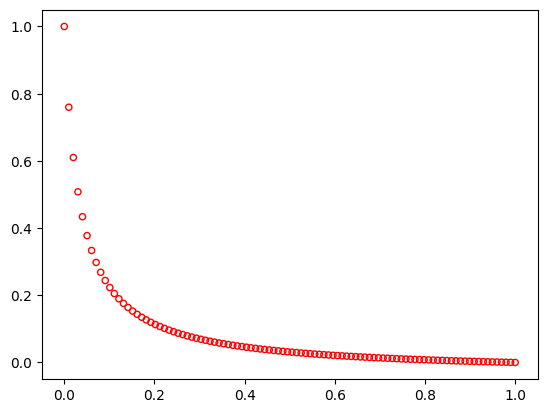

In [ ]:
import pymoo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pymoo.problems import get_problem
from pymoo.util.plotting import plot

problem = get_problem("zdt5", normalize=True)
plot(problem.pareto_front(), no_fill=True)



In [ ]:
import numpy as np

from pymoo.core.callback import Callback
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.operators.crossover.pntx import TwoPointCrossover
from pymoo.operators.mutation.bitflip import BitflipMutation
from pymoo.operators.sampling.rnd import BinaryRandomSampling
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

class callback(Callback):

    def __init__(self) -> None:
        super().__init__()
        self.std = 0
        self.mean= 0
        self.X = []

    def notify(self, algorithm):
        self.std = (np.std(algorithm.pop.get("X")))
        self.mean = (np.mean(algorithm.pop.get("X")))
        self.X = algorithm.pop.get("X")


problem = get_problem("zdt5")

algorithm = NSGA2(pop_size=100,
                  sampling=BinaryRandomSampling(),
                  crossover=TwoPointCrossover(),
                  mutation=BitflipMutation(),
                  eliminate_duplicates=True)
x_arr = []
for i in range(10):
  res = minimize(problem,
                 algorithm,
                 ('n_gen', 100),
                 callback=callback(),
                 verbose=False)
  x_arr.append(res.algorithm.callback.X)


mean_nsga2 = np.mean(x_arr)
std_nsga2 = np.std(x_arr)
f_nsga2 = res.F
print(f"NSGA2 mean: {mean_nsga2}")
print(f"NSGA2 std: {std_nsga2}")

#plot = Scatter().add(res.F)
#plot.title = "NSGA2"
#plot.show()

NSGA2 mean: 0.569675
NSGA2 std: 0.49512159554497326


In [ ]:

print(f"NSGA2 x_arr: {np.array(x_arr).shape}")

NSGA2 x_arr: (10, 100, 80)


In [ ]:
np.sum(x_arr)/(10*100*80)

0.5273375

In [ ]:
from pymoo.algorithms.moo.nsga3 import NSGA3
from pymoo.util.ref_dirs import get_reference_directions

x_arr = []

# create the reference directions
ref_dirs = get_reference_directions("uniform", 2, n_partitions=30)

algorithm = NSGA3(pop_size=100,
                  ref_dirs=ref_dirs,
                  sampling=BinaryRandomSampling(),
                  crossover=TwoPointCrossover(),
                  mutation=BitflipMutation(),
                  eliminate_duplicates=True)

x_arr = []
for i in range(10):
  res = minimize(problem,
                 algorithm,
                 ('n_gen', 100),
                 callback=callback(),
                 verbose=False)
  x_arr.append(res.algorithm.callback.X)

mean_nsga3 = np.mean(x_arr)
std_nsga3 = np.std(x_arr)
f_nsga3 = res.F
print(f"NSGA3 mean: {mean_nsga3}")
print(f"NSGA3 std: {std_nsga3}")

#plot = Scatter().add(res.F)
#plot.title = "NSGA3"
#plot.show()


NSGA3 mean: 0.5285625
NSGA3 std: 0.49918351694917773


In [ ]:
f_nsga3.shape

(15, 2)

In [ ]:
from pymoo.algorithms.moo.moead import MOEAD


ref_dirs = get_reference_directions("uniform", 2, n_partitions=30)

algorithm = MOEAD(
    ref_dirs,
    n_neighbors=50,
    prob_neighbor_mating=0.9,
    sampling=BinaryRandomSampling(),
    crossover=TwoPointCrossover(),
    mutation=BitflipMutation(),
    )

x_arr = []
for i in range(10):
  res = minimize(problem,
                 algorithm,
                 ('n_gen', 100),
                 callback=callback(),
                 verbose=False)
  x_arr.append(res.algorithm.callback.X)

mean_moead50 = np.mean(x_arr)
std_moead50 = np.std(x_arr)
f_moead50 = res.F
print(f"MOEAD 50 mean: {mean_moead50}")
print(f"MOEAD 50 std: {std_moead50}")

#plot = Scatter().add(res.F)
#plot.title = "MOEAD T = 50"
#plot.show()

MOEAD 50 mean: 0.19108870967741937
MOEAD 50 std: 0.3931587652733159


In [ ]:
f_moead50.shape

(27, 2)

In [ ]:
ref_dirs = get_reference_directions("uniform", 2, n_partitions=30)

algorithm = MOEAD(
    ref_dirs,
    n_neighbors=25,
    prob_neighbor_mating=0.9,
    sampling=BinaryRandomSampling(),
    crossover=TwoPointCrossover(),
    mutation=BitflipMutation(),
    )

x_arr = []
for i in range(10):
  res = minimize(problem,
                 algorithm,
                 ('n_gen', 100),
                 callback=callback(),
                 verbose=False)
  x_arr.append(res.algorithm.callback.X)

mean_moead25 = np.mean(x_arr)
std_moead25 = np.std(x_arr)
f_moead25 = res.F
print(f"MOEAD 25 mean: {mean_moead25}")
print(f"MOEAD 25 std: {std_moead25}")

#plot = Scatter().add(res.F)
#plot.title = "MOEAD T = 25"
#plot.show()

MOEAD 25 mean: 0.1595967741935484
MOEAD 25 std: 0.3662316805801512


In [12]:
ref_dirs = get_reference_directions("uniform", 2, n_partitions=30)

algorithm = MOEAD(
    ref_dirs,
    n_neighbors=6,
    prob_neighbor_mating=0.9,
    sampling=BinaryRandomSampling(),
    crossover=TwoPointCrossover(),
    mutation=BitflipMutation(),
    )

x_arr = []
for i in range(10):
  res = minimize(problem,
                 algorithm,
                 ('n_gen', 100),
                 callback=callback(),
                 verbose=False)
  x_arr.append(res.algorithm.callback.X)

mean_moead6 = np.mean(x_arr)
std_moead6 = np.std(x_arr)
f_moead6 = res.F
print(f"MOEAD 6 mean: {mean_moead6}")
print(f"MOEAD 6 std: {std_moead6}")

#plot = Scatter().add(res.F)
#plot.title = "MOEAD T = 6"
#plot.show()

MOEAD 6 mean: 0.2428225806451613
MOEAD 6 std: 0.4287887299988019


In [13]:
ref_dirs = get_reference_directions("uniform", 2, n_partitions=30)

algorithm = MOEAD(
    ref_dirs,
    n_neighbors=12,
    prob_neighbor_mating=0.9,
    sampling=BinaryRandomSampling(),
    crossover=TwoPointCrossover(),
    mutation=BitflipMutation(),
    )

x_arr = []
for i in range(10):
  res = minimize(problem,
                 algorithm,
                 ('n_gen', 100),
                 callback=callback(),
                 verbose=False)
  x_arr.append(res.algorithm.callback.X)

mean_moead12 = np.mean(x_arr)
std_moead12 = np.std(x_arr)
f_moead12 = res.F
print(f"MOEAD 12 mean: {mean_moead12}")
print(f"MOEAD 12 std: {std_moead12}")

#plot = Scatter().add(res.F)
#plot.title = "MOEAD T = 12"
#plot.show()

MOEAD 12 mean: 0.24016129032258066
MOEAD 12 std: 0.4271812787952835


In [14]:
from pymoo.algorithms.moo.spea2 import SPEA2
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.visualization.scatter import Scatter

algorithm = SPEA2(sampling=BinaryRandomSampling(),
                  crossover=TwoPointCrossover(),
                  mutation=BitflipMutation(),
                  eliminate_duplicates=True)

x_arr = []
for i in range(10):
  res = minimize(problem,
                 algorithm,
                 ('n_gen', 100),
                 callback=callback(),
                 verbose=False)
  x_arr.append(res.algorithm.callback.X)

mean_spea2 = np.mean(x_arr)
std_spea2 = np.std(x_arr)
f_spea2 = res.F
print(f"SPEA2 mean: {mean_spea2}")
print(f"SPEA2 std: {std_spea2}")


#plot = Scatter().add(res.F)
#plot.title = "SPEA 2"
#plot.show()

SPEA2 mean: 0.52755
SPEA2 std: 0.49924042053904244


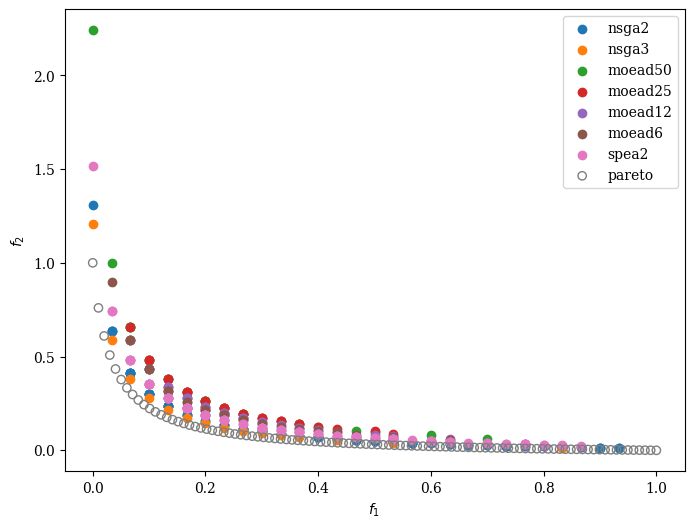

In [30]:

plot = Scatter().add(f_nsga2, label ="nsga2")
plot.add(f_nsga3, label ="nsga3")
plot.add(f_moead50, label ="moead50")
plot.add(f_moead25, label ="moead25")
plot.add(f_moead12, label ="moead12")
plot.add(f_moead6, label ="moead6")
plot.add(f_spea2, label ="spea2")
plot.add(problem.pareto_front(), label ="pareto", facecolors='none',)
plot.legend = True
plot.show()

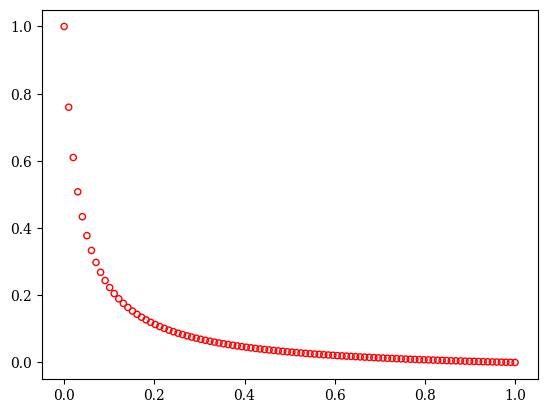

In [ ]:

from pymoo.util.plotting import plot
plot(problem.pareto_front(), no_fill=True)

In [17]:

results = pd.DataFrame({
    'Algorithm': ['NSGA-II', 'NSGA-III', 'MOEA/D T = 50', 'MOEA/D T = 25', 'MOEA/D T = 12', 'MOEA/D T = 6', "SPEA2"],
    'Mean': [mean_nsga2, mean_nsga3, mean_moead50, mean_moead25, mean_moead12, mean_moead6, mean_spea2],
    'Std': [std_nsga2, std_nsga3, std_moead50, std_moead25, std_moead12, std_moead6, std_spea2]
})
results

,Algorithm,Mean,Std
0,NSGA-II,0.569675,0.495122
1,NSGA-III,0.528563,0.499184
2,MOEA/D T = 50,0.191089,0.393159
3,MOEA/D T = 25,0.159597,0.366232
4,MOEA/D T = 12,0.240161,0.427181
5,MOEA/D T = 6,0.242823,0.428789
6,SPEA2,0.527550,0.499240


In [ ]:
f_nsga2.shape

(100, 2)

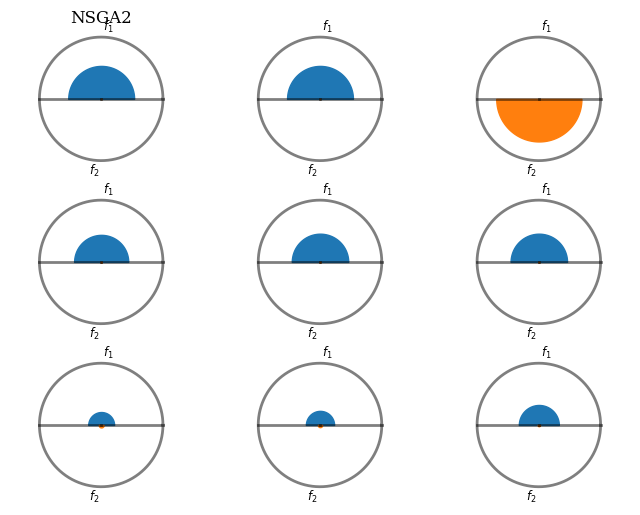

In [ ]:
from pymoo.visualization.petal import Petal
plot = Petal(bounds=[0, 1.75])
#plot.add(f_nsga2[-3:])
plot.title = ["nsga2"] + [""]*8
plot.add(f_nsga2[:3])
plot.add(f_nsga2[48:51])
plot.add(f_nsga2[-3:])
plot.show()

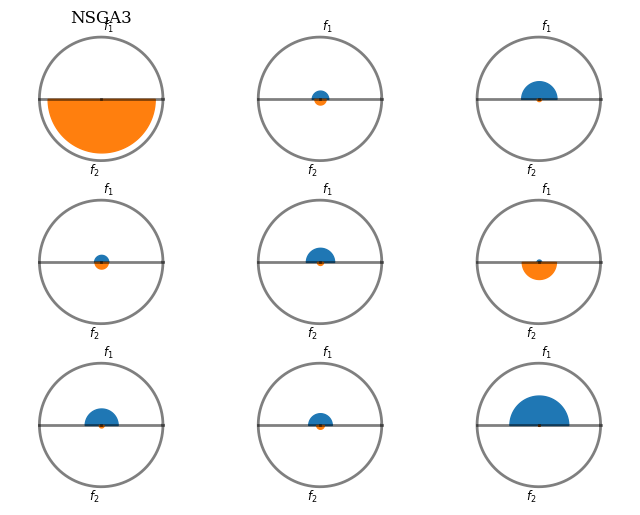

In [ ]:
from pymoo.visualization.petal import Petal
plot = Petal(bounds=[0, 1.75])
#plot.add(f_nsga2[-3:])
plot.title = ["NSGA3"] + [""]*8
plot.add(f_nsga3[:3])
plot.add(f_nsga3[8:11])
plot.add(f_nsga3[-3:])
plot.show()


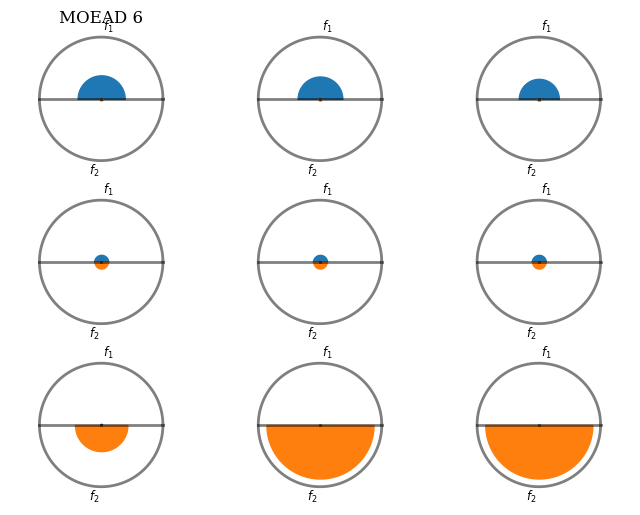

In [ ]:
from pymoo.visualization.petal import Petal
plot = Petal(bounds=[0, 1.75])
#plot.add(f_nsga2[-3:])
plot.title = ["MOEAD 6"] + [""]*8
plot.add(f_moead6[:3])
plot.add(f_moead6[36:39])
plot.add(f_moead6[-3:])
plot.show()

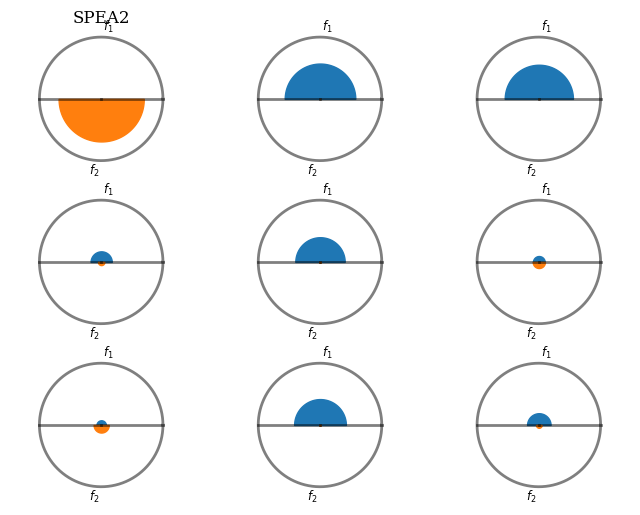

In [ ]:
from pymoo.visualization.petal import Petal
plot = Petal(bounds=[0, 1.75])
#plot.add(f_nsga2[-3:])
plot.title = ["SPEA2"] + [""]*8
plot.add(f_spea2[:3])
plot.add(f_spea2[48:51])
plot.add(f_spea2[-3:])
plot.show()

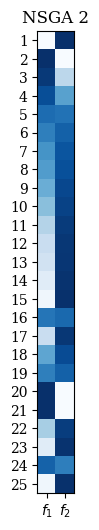

In [26]:
from pymoo.visualization.heatmap import Heatmap
heat = Heatmap().add(f_nsga2[::4])

heat.title = "NSGA 2"
heat.show()



In [28]:
f_nsga3.shape

(15, 2)

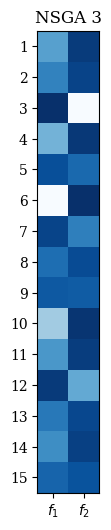

In [29]:

heat = Heatmap().add(f_nsga3)
heat.title = "NSGA 3"
heat.show()

In [23]:
f_moead6.shape


(27, 2)

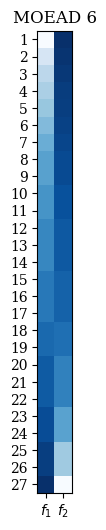

In [27]:

heat = Heatmap().add(f_moead6)
heat.title = "MOEAD 6"
heat.show()

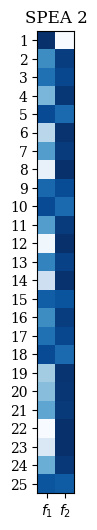

In [ ]:
heat = Heatmap().add(f_spea2[::4])
heat.title = "SPEA 2"
heat.show()